<i>Johdanto datatieteeseen - Introduction to Data Science, TIJO.222, Rasmus Karppinen, Spring 2023</i><br>
<hr>

# Data Science Airbnb Project Template


### Introduction

In this workbook, I use Airbnb data on apartments in Rome. This data source is particularly interesting and timely for me, as I am going to the city for a student exchange in the autumn, and data science will also help me to get to know the city's housing supply better. The aim of the project is to identify the main characteristics of Airbnb accommodation and factors such as price, as well as potentially identifying suitable neighbourhoods for my own accommodation. With minor modifications, the same project template could well be used for Airbnb listings in other cities, assuming that all tables on the same page have a similar column structure.

### The most important libraries

In data science, several different Python libraries are used to provide methods for reading, processing, analysing and visualising data. The most important library in my opinion is Pandas, which can be used to create a structure for data that can be easily manipulated and manipulated into the desired format. If you want to read data from web sources or scrape the html code of a web page, you can use the libraries BeautifulSoup and Requests. For data analysis, classification and prediction, Scikit-learn offers several powerful methods. Finally, the findings from the data can be visualised using methods from libraries such as Seaborn and Matplotlib.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from bs4 import BeautifulSoup
import requests

### Reading data

The data used in this data science project is available on the website in the .csv file format. In order to use the data in the project, it is read by searching the html code of the page to find the element containing the file. However, in order to find the correct file in the html code, it is necessary to study it carefully first, so that the program code can be structured correctly in relation to the elements of the code. Once the csv file has been retrieved as a variable, its contents can be converted into a more manageable format, the Pandas data frame. The read_csv method in the Pandas library detects the structure of the file and creates the columns and rows in the dataframe automatically. In addition to retrieving data from the web, data could also be read directly from a file in the user's storage, but in this case other users would not be able to run the same project without that file.

In [7]:
#Retrieve a table online of Airbnb apartments in Rome

#The contents of the webpage with the necessary information
url = 'http://insideairbnb.com/get-the-data'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

#Find the correct table from the html code with the header containing the city name
rome_table = soup.find('h3', text='Rome, Lazio, Italy').find_next('tbody')

#Search the correct row and csv-file link from the table
for row in rome_table.find_all('tr'):
    cells = row.find_all('td')
    if cells[1].find('a').text.strip() == 'listings.csv':
        listings_csv = cells[1].find('a')['href']

    #Retrieve also a geojson-file of city areas for visualization purposes later
    elif cells[1].find('a').text.strip() == 'neighbourhoods.geojson':
        neighbourhood_areas = cells[1].find('a')['href']

#Transform csv-file into a dataframe
df = pd.read_csv(listings_csv)

In [40]:
df.head(10)

id                                               name  host_id  \
0  256695                             Trastevere color-suite  1350540   
1    2737                   Elif's room in cozy, clean flat.     3047   
2  137044  In Campo de 'Fiori! For families and friends i...   670337   
3  137157            Super balcony in center on Romans roofs   486866   
4  258330  Sunny with view, WiFi, A/C. Metro, Airport train.  1358462   
5  137713                60sqm apt Campo de' Fiori with Wifi   246365   
6  137724                Studio in Campo de' Fiori with Wifi   246365   
7    3079          Cozy apartment  (2-4)with Colisseum  view     3504   
8  259075         City Center: Large, Chic, Modern apartment  1311777   
9   11834                   Rome "Charming Boschetto Studio"    44552   

      host_name  neighbourhood_group               neighbourhood  latitude  \
0        Marina                  NaN            I Centro Storico  41.88862   
1          Elif                  NaN           VIII Appia Antica  41.87136   
2  Massimiliano                  NaN            I Centro Storico  41.89620   
3     Raffaella                  NaN            I Centro Storico  41.89400   
4     Francesco                  NaN  VII San Giovanni/Cinecittà  41.88008   
5         Carla                  NaN            I Centro Storico  41.89579   
6         Carla                  NaN            I Centro Storico  41.89737   
7         Laura                  NaN            I Centro Storico  41.89500   
8     Francesca                  NaN                XIII Aurelia  41.89984   
9        Serena                  NaN            I Centro Storico  41.89650   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0   12.47607  Entire home/apt    124               3                212   
1   12.48215     Private room     45               7                  7   
2   12.47071  Entire home/apt    216               3                117   
3   12.47896  Entire home/apt    175               3                  6   
4   12.52006  Entire home/apt     80               3                 72   
5   12.47098  Entire home/apt    149               2                129   
6   12.47008  Entire home/apt     86               3                194   
7   12.49117  Entire home/apt     94              20                 21   
8   12.45392  Entire home/apt    202               3                172   
9   12.49211  Entire home/apt    105               2                175   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2022-12-05               1.54                               1   
1  2015-05-28               0.07                               6   
2  2023-02-12               1.02                               1   
3  2016-06-20               0.04                               5   
4  2023-03-02               0.55                               1   
5  2022-09-25               0.91                               2   
6  2023-02-13               1.37                               2   
7  2022-04-30               0.14                               5   
8  2023-03-07               1.29                               2   
9  2023-02-26               1.21                               1   

   availability_365  number_of_reviews_ltm  \
0               181                     23   
1               322                      0   
2               184                     23   
3               271                      0   
4               154                      8   
5               120                     19   
6               245                     32   
7               290                      1   
8               173                     48   
9               266                     33   

                                   license  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                    

### Preparing data

Data is rarely available in a complete form that can be used for analysis and visualisation. Often, for example, the data may contain empty values that distort the results or prevent some operations from being performed. By examining the data with a method such as df.info(), it is possible to identify unnecessary columns in the table, or data that are in the wrong format for analysis. The data should often be in as complete a numerical format as possible, so that various methods can read it and, for example, form predictive models. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34061 entries, 0 to 34060
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34061 non-null  int64  
 1   name                            34061 non-null  object 
 2   host_id                         34061 non-null  int64  
 3   host_name                       34061 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   34061 non-null  object 
 6   latitude                        34061 non-null  float64
 7   longitude                       34061 non-null  float64
 8   room_type                       34061 non-null  object 
 9   price                           30296 non-null  float64
 10  minimum_nights                  34061 non-null  int64  
 11  number_of_reviews               34061 non-null  int64  
 12  last_review                     

In [8]:
#Delete columns with only or mostly null values
df.drop('neighbourhood_group', axis=1, inplace=True)
df.drop('license', axis=1, inplace=True)

#Transform datatype to date
df['last_review'] = pd.to_datetime(df['last_review'])

#Fill null values in name columns
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

#Data includes some apartments with nightly rates in tens of thousands
#Sort out rows with price exceeding 1000
df = df[df['price'] < 1000]

#Transform price into a decimal number
df['price'] = df['price'].astype(float)
df_orig = df

#Transform room types and neighbourhoods into numerical (0 0r 1) values in their own columns
df = pd.concat([df, pd.get_dummies(df['room_type'], prefix='room_type')], axis=1)
df = pd.concat([df, pd.get_dummies(df['neighbourhood'], prefix='neighbourhood')], axis=1)


### Understanding the data

In data science, it is very important to understand the nature of the data being processed in order to choose the right methods for analysis and data cleaning. It is important to know, for example, which columns are in the data and what data types they contain. A good command for this is, for example, df.info(). In addition, the values of a single column can be examined by examining, for example, unique values with df['neighbourhood'].unique().

In [9]:
print(df.info())
print(df['neighbourhood'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29945 entries, 0 to 34060
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        29945 non-null  int64         
 1   name                                      29945 non-null  object        
 2   host_id                                   29945 non-null  int64         
 3   host_name                                 29945 non-null  object        
 4   neighbourhood                             29945 non-null  object        
 5   latitude                                  29945 non-null  float64       
 6   longitude                                 29945 non-null  float64       
 7   room_type                                 29945 non-null  object        
 8   price                                     29945 non-null  float64       
 9   minimum_nights              

### Creating a model

Data science can be used, for example, to predict and classify different values in data. In this project, I aim to create a prediction model that uses housing characteristics such as location, number of assessments and housing type to estimate the appropriate price for a flat. There are several different types of prediction models, so here I will use the LinearRegression, DecisionTreeRegressor and RandomForestRegressor functions found in the Scikit-learn library, and compare their results.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Create a new dataframe with columns removed, that are presumed irrelevant
df_model = df.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'room_type', 'last_review'], axis=1)
df_model = df_model.dropna(subset=['reviews_per_month'])

#Split data for training a testing the model
X_train, X_test, y_train, y_test = train_test_split(df_model.drop('price', axis=1), df_model['price'], test_size=0.2, random_state=42)

X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

#Create predictions with each model
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

#Calculate error with each model
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Linear Regression MSE: {:.2f}".format(lr_mse))
print("Mean absolute error: {:.2f}".format(lr_mae))
print("R2 score: {:.2f}".format(lr_r2))

print("\nDecision Tree MSE: {:.2f}".format(dt_mse))
print("Mean absolute error: {:.2f}".format(dt_mae))
print("R2 score: {:.2f}".format(dt_r2))

print("\nRandom Forest MSE: {:.2f}".format(rf_mse))
print("Mean absolute error: {:.2f}".format(rf_mae))
print("R2 score: {:.2f}".format(rf_r2))

Linear Regression MSE: 11338.10
Mean absolute error: 66.93
R2 score: 0.21

Decision Tree MSE: 19779.60
Mean absolute error: 81.65
R2 score: -0.37

Random Forest MSE: 9382.29
Mean absolute error: 60.10
R2 score: 0.35


### Evaluating the predictions

From the results, it can be seen that this Airbnb data does not allow for the prediction of house prices by the columns found in the table. This could be explained, for example, by the fact that the size of the apartment, which generally has a significant impact on the price of housing, was not available at all in this data. Also, no more detailed information on the characteristics, year of construction or condition of the properties was available. Therefore, this data is not the best for creating a forecasting model, but it could be more useful for creating classification models or visualisations. A further simple classification model will be created, where the coordinates of the apartment will be used to classify it as belonging to the correct district.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Split the data for training and testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(df[['latitude', 'longitude']], df['neighbourhood'], test_size=0.2, random_state=42)

#Create a classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train1, y_train1)

#Create predictions and test accuracy
y_pred1 = clf.predict(x_test1)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Decision tree classifier \nAccuracy: {accuracy:.3f}")

Decision tree classifier 
Accuracy: 0.989


### Evaluating the classifier

As expected, using the DecisionTree classifier to estimate the district from the coordinates is very accurate. 

### Unsupervised learning

The data used contains only basic information on apartments, making it difficult to create an explanatory predictor. The data also does not contain verbal descriptions of the apartments or verbal evaluations, but such information could be used to exploit natural language analysis and identify more modelable information from the data. However, the data does allow for clustering, i.e., identifying clusters or sets of housing listings based on their characteristics. Since it makes most sense to model the geographic data using a map, clusters are formed based on room type, price, minimum number of nights, number of reviews, number of listings by host, and days available.

In [13]:
df_clust = df_orig[['room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].copy()

#Muutetaan asuntotyypit numeerisiksi Transform room types to numerical
room_dict = {'Entire home/apt': 0, 'Private room': 1, 'Hotel room': 2, 'Shared room': 3}
df_clust['room_type'].replace(room_dict, inplace=True)
df_clust = df_clust.astype(float)

df_clust.head(10)

room_type  price  minimum_nights  number_of_reviews  \
0        1.0   56.0             7.0                5.0   
1        0.0  140.0             7.0               21.0   
2        0.0  110.0             2.0              253.0   
3        0.0  130.0             1.0               73.0   
4        0.0  168.0             3.0              157.0   
5        0.0  145.0             3.0               46.0   
6        0.0  175.0             3.0               51.0   
7        0.0  270.0             3.0               81.0   
8        1.0   94.0             2.0              633.0   
9        1.0  134.0             2.0               16.0   

   calculated_host_listings_count  availability_365  
0                             6.0             360.0  
1                             6.0             253.0  
2                             1.0              59.0  
3                             1.0             330.0  
4                             5.0              44.0  
5                             5.0              44.0  
6                             5.0             301.0  
7                             5.0             306.0  
8                             8.0             278.0  
9                             3.0              27.0

In [14]:
df_clust.describe()

room_type         price  minimum_nights  number_of_reviews  \
count  29945.000000  29945.000000    29945.000000       29945.000000   
mean       0.257205    174.687293        2.797395          59.855068   
std        0.484360    123.096097       14.035164          96.005604   
min        0.000000      8.000000        1.000000           0.000000   
25%        0.000000     99.000000        1.000000           3.000000   
50%        0.000000    140.000000        2.000000          20.000000   
75%        0.000000    205.000000        3.000000          74.000000   
max        3.000000    999.000000      999.000000        2317.000000   

       calculated_host_listings_count  availability_365  
count                    29945.000000      29945.000000  
mean                        10.115412        213.033595  
std                         32.982775        108.054331  
min                          1.000000          0.000000  
25%                          1.000000        124.000000  
50%                          2.000000        235.000000  
75%                          6.000000        314.000000  
max                        302.000000        365.000000

In [15]:
from sklearn.preprocessing import StandardScaler

#Normalize data for clustering
scaler = StandardScaler()
df_clust_norm = scaler.fit_transform(df_clust)

df_clust_norm = pd.DataFrame(df_clust_norm, columns=df_clust.columns)
df_clust_norm.describe()

room_type         price  minimum_nights  number_of_reviews  \
count  2.994500e+04  2.994500e+04    2.994500e+04       29945.000000   
mean  -2.088087e-17  9.491304e-17    2.088087e-17           0.000000   
std    1.000017e+00  1.000017e+00    1.000017e+00           1.000017   
min   -5.310286e-01 -1.354146e+00   -1.280659e-01          -0.623464   
25%   -5.310286e-01 -6.148737e-01   -1.280659e-01          -0.592216   
50%   -5.310286e-01 -2.817951e-01   -5.681505e-02          -0.415140   
75%   -5.310286e-01  2.462565e-01    1.443575e-02           0.147337   
max    5.662812e+00  6.696609e+00    7.098023e+01          23.510946   

       calculated_host_listings_count  availability_365  
count                    2.994500e+04      2.994500e+04  
mean                     6.643913e-18     -1.290817e-16  
std                      1.000017e+00      1.000017e+00  
min                     -2.763735e-01     -1.971574e+00  
25%                     -2.763735e-01     -8.239844e-01  
50%                     -2.460541e-01      2.032938e-01  
75%                     -1.247767e-01      9.344197e-01  
max                      8.849755e+00      1.406412e+00

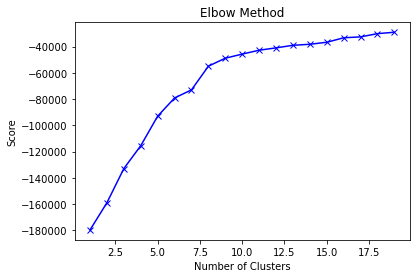

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Estimate suitable amount of clusters with elbow method

k = range(1, 20)
#Fit KMeans for all k values by a for loop
kmeans = [KMeans(n_clusters=i, random_state=42, n_init='auto') for i in k]
score = [kmeans[i].fit(df_clust_norm).score(df_clust_norm) for i in range(len(kmeans))]

plt.plot(k, score, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [21]:
#Choose 5 as the amount of clusters as elbow method shows no steep change after that

kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')

kmeans.fit(df_clust_norm)

#Create a column for clusters
df_clust['cluster'] = kmeans.labels_

df_clust.head(10)

room_type  price  minimum_nights  number_of_reviews  \
0        1.0   56.0             7.0                5.0   
1        0.0  140.0             7.0               21.0   
2        0.0  110.0             2.0              253.0   
3        0.0  130.0             1.0               73.0   
4        0.0  168.0             3.0              157.0   
5        0.0  145.0             3.0               46.0   
6        0.0  175.0             3.0               51.0   
7        0.0  270.0             3.0               81.0   
8        1.0   94.0             2.0              633.0   
9        1.0  134.0             2.0               16.0   

   calculated_host_listings_count  availability_365  cluster  
0                             6.0             360.0        2  
1                             6.0             253.0        0  
2                             1.0              59.0        3  
3                             1.0             330.0        0  
4                             5.0              44.0        0  
5                             5.0              44.0        0  
6                             5.0             301.0        0  
7                             5.0             306.0        0  
8                             8.0             278.0        3  
9                             3.0              27.0        2

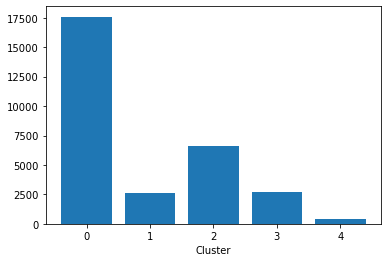

In [22]:
#Examine distribution of clusters with a column chart
plt.bar(df_clust['cluster'].value_counts().index, df_clust['cluster'].value_counts().values)

plt.xlabel('Cluster')
plt.show()

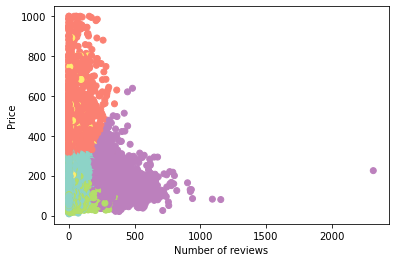

In [23]:
#The chart shows that one cluster has almost no values
#They are likely outliers

#Examine the effect of listing price and availability on the clusters
plt.scatter(df_clust['number_of_reviews'], df_clust['price'], c=df_clust['cluster'], cmap='Set3')
plt.xlabel('Number of reviews')
plt.ylabel('Price')
plt.show()

### Evaluating the clusters

The data was successfully clustered and at least the last graph shows a clear group in purple, with the highest number of estimates. One could conclude, for example, that cheaper destinations are more popular, since almost all the destinations that have received a lot of reviews are at the lower end of the price range.

### Data visualization

Let's take a look at a map to see how Airbnb apartments are distributed in different areas of the city. The Folium library is useful for visualising geographical data.

In [24]:
import folium

#Create a smaller dataset for visualization, choose 5000 listings with the most reviews
sub_df = df.nlargest(5000, 'number_of_reviews')

#Define centre point of the map
center_lat, center_lon = sub_df['latitude'].mean(), sub_df['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

#Define different colours for the neghbourhoods
colors = {'I Centro Storico': 'red',
          'II Parioli/Nomentano': 'blue',
          'III Monte Sacro': 'green',
          'IV Tiburtina': 'orange',
          'IX Eur': 'purple',
          'V Prenestino/Centocelle': 'darkred',
          'VI Roma delle Torri': 'deeppink',
          'VII San Giovanni/Cinecittà': 'darkblue',
          'VIII Appia Antica': 'darkpurple',
          'X Ostia/Acilia': 'lightgreen',
          'XI Arvalia/Portuense': 'gray',
          'XII Monte Verde': 'forestgreen',
          'XIII Aurelia': 'black',
          'XIV Monte Mario': 'teal',
          'XV Cassia/Flaminia': 'saddlebrown'}

#Create neighbourhood areas on the map with the geojson-file
folium.GeoJson(neighbourhood_areas,
               name='Neighborhoods',
               style_function=lambda feature: {
                   'fillColor': colors[feature['properties']['neighbourhood']],
                   'color': 'gray',
                   'weight': 1,
                   'fillOpacity': 0.2,
               },
               highlight_function=lambda x: {'weight': 3, 'color': 'black'},
               tooltip=folium.GeoJsonTooltip(fields=['neighbourhood'], aliases=['Neighborhood'])
              ).add_to(m)

#Create a marker on the map from each listing
for i, row in sub_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=2,
                        color=colors[row['neighbourhood']],
                        fill=True,
                        fill_opacity=0.7,
                        tooltip=f"Neighborhood: {row['neighbourhood']}\nPrice: {row['price']}"
                       ).add_to(m)
    
#Highlight the location of the university campus
uni_lat, uni_lon = 41.905321, 12.518364

folium.Marker(location=[uni_lat, uni_lon], 
              popup='La Sapienza University of Rome', 
              icon=folium.Icon(color='gray', icon='university', prefix='fa')
             ).add_to(m)

m


The map shows that a large proportion of the most popular and therefore probably the most reliable listings are concentrated in the red area of central Rome, while the university itself is in an adjacent district. Since, as a student, the price of rent is also important, let's look again at the price distribution in the different districts.

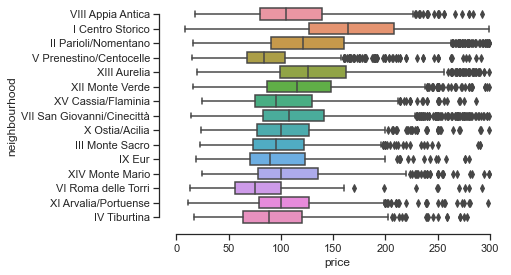

In [25]:
sns.set(style="ticks", palette="pastel")

#Exclude overpriced listings with nightly rates over 300e
df_filt = df[df['price'] < 300]

#Create a box chart of prices in different neighbourhoods
boxplot = sns.boxplot(x="price", y="neighbourhood", data=df_filt)
sns.despine(offset=10, trim=True)

### Evaluating the visualizations

As you might expect, the 'I Centro Storico' area of central Rome is the most expensive, so it's not necessarily a good place to look for cost-effective accommodation. On the other hand, the district where the university is located, 'II Parioli/Nomentano', and the adjacent 'IV Tiburtina' are considerably cheaper in terms of price, but still in good locations, so I think it's worth starting the search for accommodation there.